## Odds and Ends: File Reading and Matplotlib

Now that we're familiar with the essentials of the Python language we're going to practice [reading files](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/WorkingWithFiles.html) and [plotting with Matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html). 

Although these topics may be considered "odds and ends", they are common in many day-to-day applications. You'll find that spending some time up front to become familiar with these materials will save a lot of time down the road.

## Problem 1: Reading and Parsing Files
Let's pretend we were conducting a survey of favorite foods. Each participant is asked to list their favorite foods along with its category (e.g. dessert, snack, fruit). The food and category are separated by a colon, and each food-category pair is separated by a comma like so

```food: category, food: category, food: category, ... ```

The results of this survey are stored in a text file, `results.txt`, giving us a great opportunity to practice our file reading skills!

Our task is to write a function called `get_most_popular_foods` that takes a file path of survey results and returns the most common response for each food category in the form of a dictionary where the keys are the food categories and the values are the most common food of that type. If there is a tie, return the food that comes first alphabetically. Note, we don't know which food categories will be given before reading the file.

So, if we had data in the file `example.txt` with the contents below

``` granola bars: snack, shrimp: seafood
granola bars: snack
tuna: seafood ```

Our function would produce the following result
 ``` python
 >>> get_most_popular_foods('example.txt')
  {'snack': 'granola bars', 'seafood': ' shrimp'}
 ```
 
 The `collections.Counter` object will be useful for this problem. Also, the function `itertools.chain` may come in handy.
 
For reference, there is a short example input under `resources/example-survey.txt`. On this input, your function should produce the response as follows
 ``` python
>>> get_most_popular_foods('resources/example-survey.txt')
 {'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}
```

In [6]:
from collections import Counter
import itertools 
from pathlib import Path


def get_most_popular_foods(file_path):
    """ Read in survey and determine the most common food of each type.
    
    Parameters
    ----------
    file_path : str
        Path to text file containing favorite food survey responses.
            
    Returns
    -------
    Dict[str, str]
        Dictionary with the key being food type and value being food.
    """
    root = Path(".")
    alphenumerator = list(enumerate("abcdefghijklmnopqrstuvwxyz"))
    alphabet = {}
    for i in alphenumerator:
        alphabet.update({i[1]:i[0]})

    dataset = {}
    foods = []
    finaldict = {}
    setlist = []
    summary = []
    sort = []

    with open(file_path, "r") as var:
        data = list(var.read().splitlines())
        new = list(itertools.chain(*(i.split(",") for i in data))) 
        print("new:", new, len(new))


        item = [list(i.split(":")) for i in new]
        for i in item:
            i[0],i[1] = i[0].strip(),i[1].strip()
        setlist = item
        print("\n", "setlist:",setlist, len(setlist))

        print("\n",item,len(item))
        for i in dict(enumerate(setlist)).values():
            foods.append(i[0]) #placing each food (non-unique) into a list to count
        print(foods, "\n", len(foods))
        count = dict(Counter(foods)) #counting the number of each food in that list
        print("\n",count,"\n",sum(count.values()))

        for el in setlist:
            for i in count.keys():
                if i == (el[0])  and ([el[1], i, count[i]]) not in summary:
                    summary.append([el[1], i, count[i]])
        print("\n", summary, "\n")
        
        for this in summary:
            for that in summary:
#                 print("\n",this,that)
                if this != that and this[0] == that[0]:
                    if this[2] != None and that[2] != None:
                        if this[2] > that[2]:
                            that[2] = None
                    if this[2] != None and that[2] != None:
                        if this[2] < that[2]:
                            this[2] = None
                    if this[2] != None and that[2] != None:
                        if this[2] == that[2]:
                            foodx,foody = list(this[1].replace(" ","")),list(that[1].replace(" ",""))
                            print(foodx,foody)
                            for i in range(0,4):
                                print(foodx[i], " vs ", foody[i])                                
                                if foodx[i] != foody[i]:
                                    if alphabet[foodx[i]] < alphabet[foody[i]]:
                                        print("alph:", i)
                                        print("hi")
                                        that[2] = None
                                    break
                                
                            print("\n\n", "ALPHABETIZED 1 ", "\n\n", summary, "\n\n")

                                
                    if this[2] != None and that[2] != None:
                        if this[2] == that[2]:
                            foodx,foody = list(this[1].replace(" ","")),list(that[1].replace(" ",""))
                            print(foodx,foody)
                            for i in range(0,4):
                                print(foodx[i], " vs ", foody[i])
                                if foodx[i] != foody[i]:
                                    if alphabet[foodx[i]] > alphabet[foody[i]]:
                                        print("alph:", i)
                                        print("hello")
                                        this[2] = None
                                    break
#                                         print("REMOVED:",this)
                                
                                    
                                        
                            print("\n\n", "ALPHABETIZED 2 ", "\n\n", summary, "\n\n")
#                         if this[2] > that[2]:
                            
            if this[2] != None:
                sort.append(this)
        print(summary, "\n", sort)
        
        for i in sort:
            dataset[i[0]] = i[1]
    #         print(dataset)
        return dataset
    pass

# get_most_popular_foods(resources/example-survey.txt)

In [5]:
from bwsi_grader.python.odds_and_ends import grade_file_parser
# from IPython.display import clear_output
grade_file_parser(get_most_popular_foods)
# clear_output()


ModuleNotFoundError: No module named 'bwsi_grader'

In [7]:
# root
# ptd = path_to_data
ptd1 = root / "resources" / "example-survey.txt"

with open(ptd1, mode="r") as var:
#     f.write("cake: dessert, kale: vegetable\ncarrots: vegetable\npears: fruit\npeaches: fruit\npeaches: fruit")
    content = var.readlines()
content

NameError: name 'root' is not defined

In [1766]:
#backup rewrite file
with open(ptd1, mode="w") as f:
    f.write("cake: dessert, kale: vegetablecarrots: vegetablepears: fruitpeaches: fruitpeaches: fruit")

range(0, 10)


## Problem 2: Plotting an Image with Matplotlib

We have an image in the file `resources/mystery-img.npy`. Read and plot the image, then answer the following for Question 2 of the homework:

__What is in this image?__

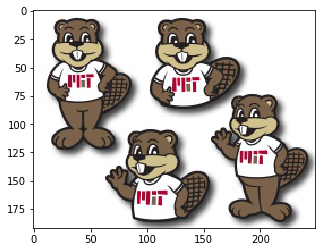

In [2]:
import numpy as np
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt


im = np.load("resources/mystery-img.npy")
plt.imshow(im, cmap='gray')
